In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
## Hybrid models
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.deterministic import DeterministicProcess

# read data 

In [3]:
data_raw = pd.read_csv("Verbr_2008_2021_sanitarisiert.txt", sep='\t')

In [4]:
data_raw = data_raw.set_index("MatNr_n")

In [5]:
data_raw[100:]

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
55168752200,0,0,0,0,0,0,0,0,0,0,...,1,1,4,3,3,0,0,1,0,0
55785227225,0,0,0,1,1,2,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
56334465415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56557777948,0,0,0,8,0,1,4,1,10,24,...,135,73,87,64,108,86,63,47,122,34
57406506203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653761044143,0,0,0,0,0,0,1,0,5,0,...,4,0,0,0,4,2,4,4,0,4
7654080459855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_raw.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
data_raw.index[100]

55168752200

In [8]:
pd.to_datetime(data_raw.index, unit='us')

DatetimeIndex(['1970-01-02 04:42:59.653791', '1970-01-02 04:54:40.986274',
               '1970-01-02 05:10:25.501059', '1970-01-02 05:28:50.007753',
               '1970-01-02 05:42:19.853290', '1970-01-02 20:43:12.885671',
               '1970-01-02 20:45:07.452321', '1970-01-02 20:52:19.455622',
               '1970-01-02 21:19:41.801118', '1970-01-02 21:34:48.406416',
               ...
               '1970-03-30 13:03:09.836410', '1970-03-30 13:18:59.105597',
               '1970-03-30 13:20:57.034321', '1970-03-30 13:30:57.006310',
               '1970-03-30 13:31:36.466448', '1970-03-30 13:52:34.999930',
               '1970-03-30 14:02:41.044143', '1970-03-30 14:08:00.459855',
               '1970-03-30 14:24:15.223997', '1970-03-30 14:44:38.055228'],
              dtype='datetime64[ns]', name='MatNr_n', length=150810, freq=None)

In [9]:
data_raw[data_raw['M200803'] > 10000]

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
1813773580904,0,40000,130000,0,30000,20000,0,30000,0,0,...,0,0,0,0,0,0,0,0,0,0
6764026631562,1125,2400,23305,0,700,850,5640,24986,2050,750,...,5719,31857,1466,3068,12806,3284,3556,5696,829,2260


In [10]:
data_raw.describe().T.index

Index(['M200801', 'M200802', 'M200803', 'M200804', 'M200805', 'M200806',
       'M200807', 'M200808', 'M200809', 'M200810',
       ...
       'M202103', 'M202104', 'M202105', 'M202106', 'M202107', 'M202108',
       'M202109', 'M202110', 'M202111', 'M202112'],
      dtype='object', length=168)

In [11]:
df = data_raw.copy()

## EDA Data

In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150810 entries, 103379653791 to 7656278055228
Columns: 168 entries, M200801 to M202112
dtypes: int64(168)
memory usage: 194.4 MB


In [13]:
data_raw

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
103379653791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104080986274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105025501059,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106130007753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106939853290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653761044143,0,0,0,0,0,0,1,0,5,0,...,4,0,0,0,4,2,4,4,0,4
7654080459855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


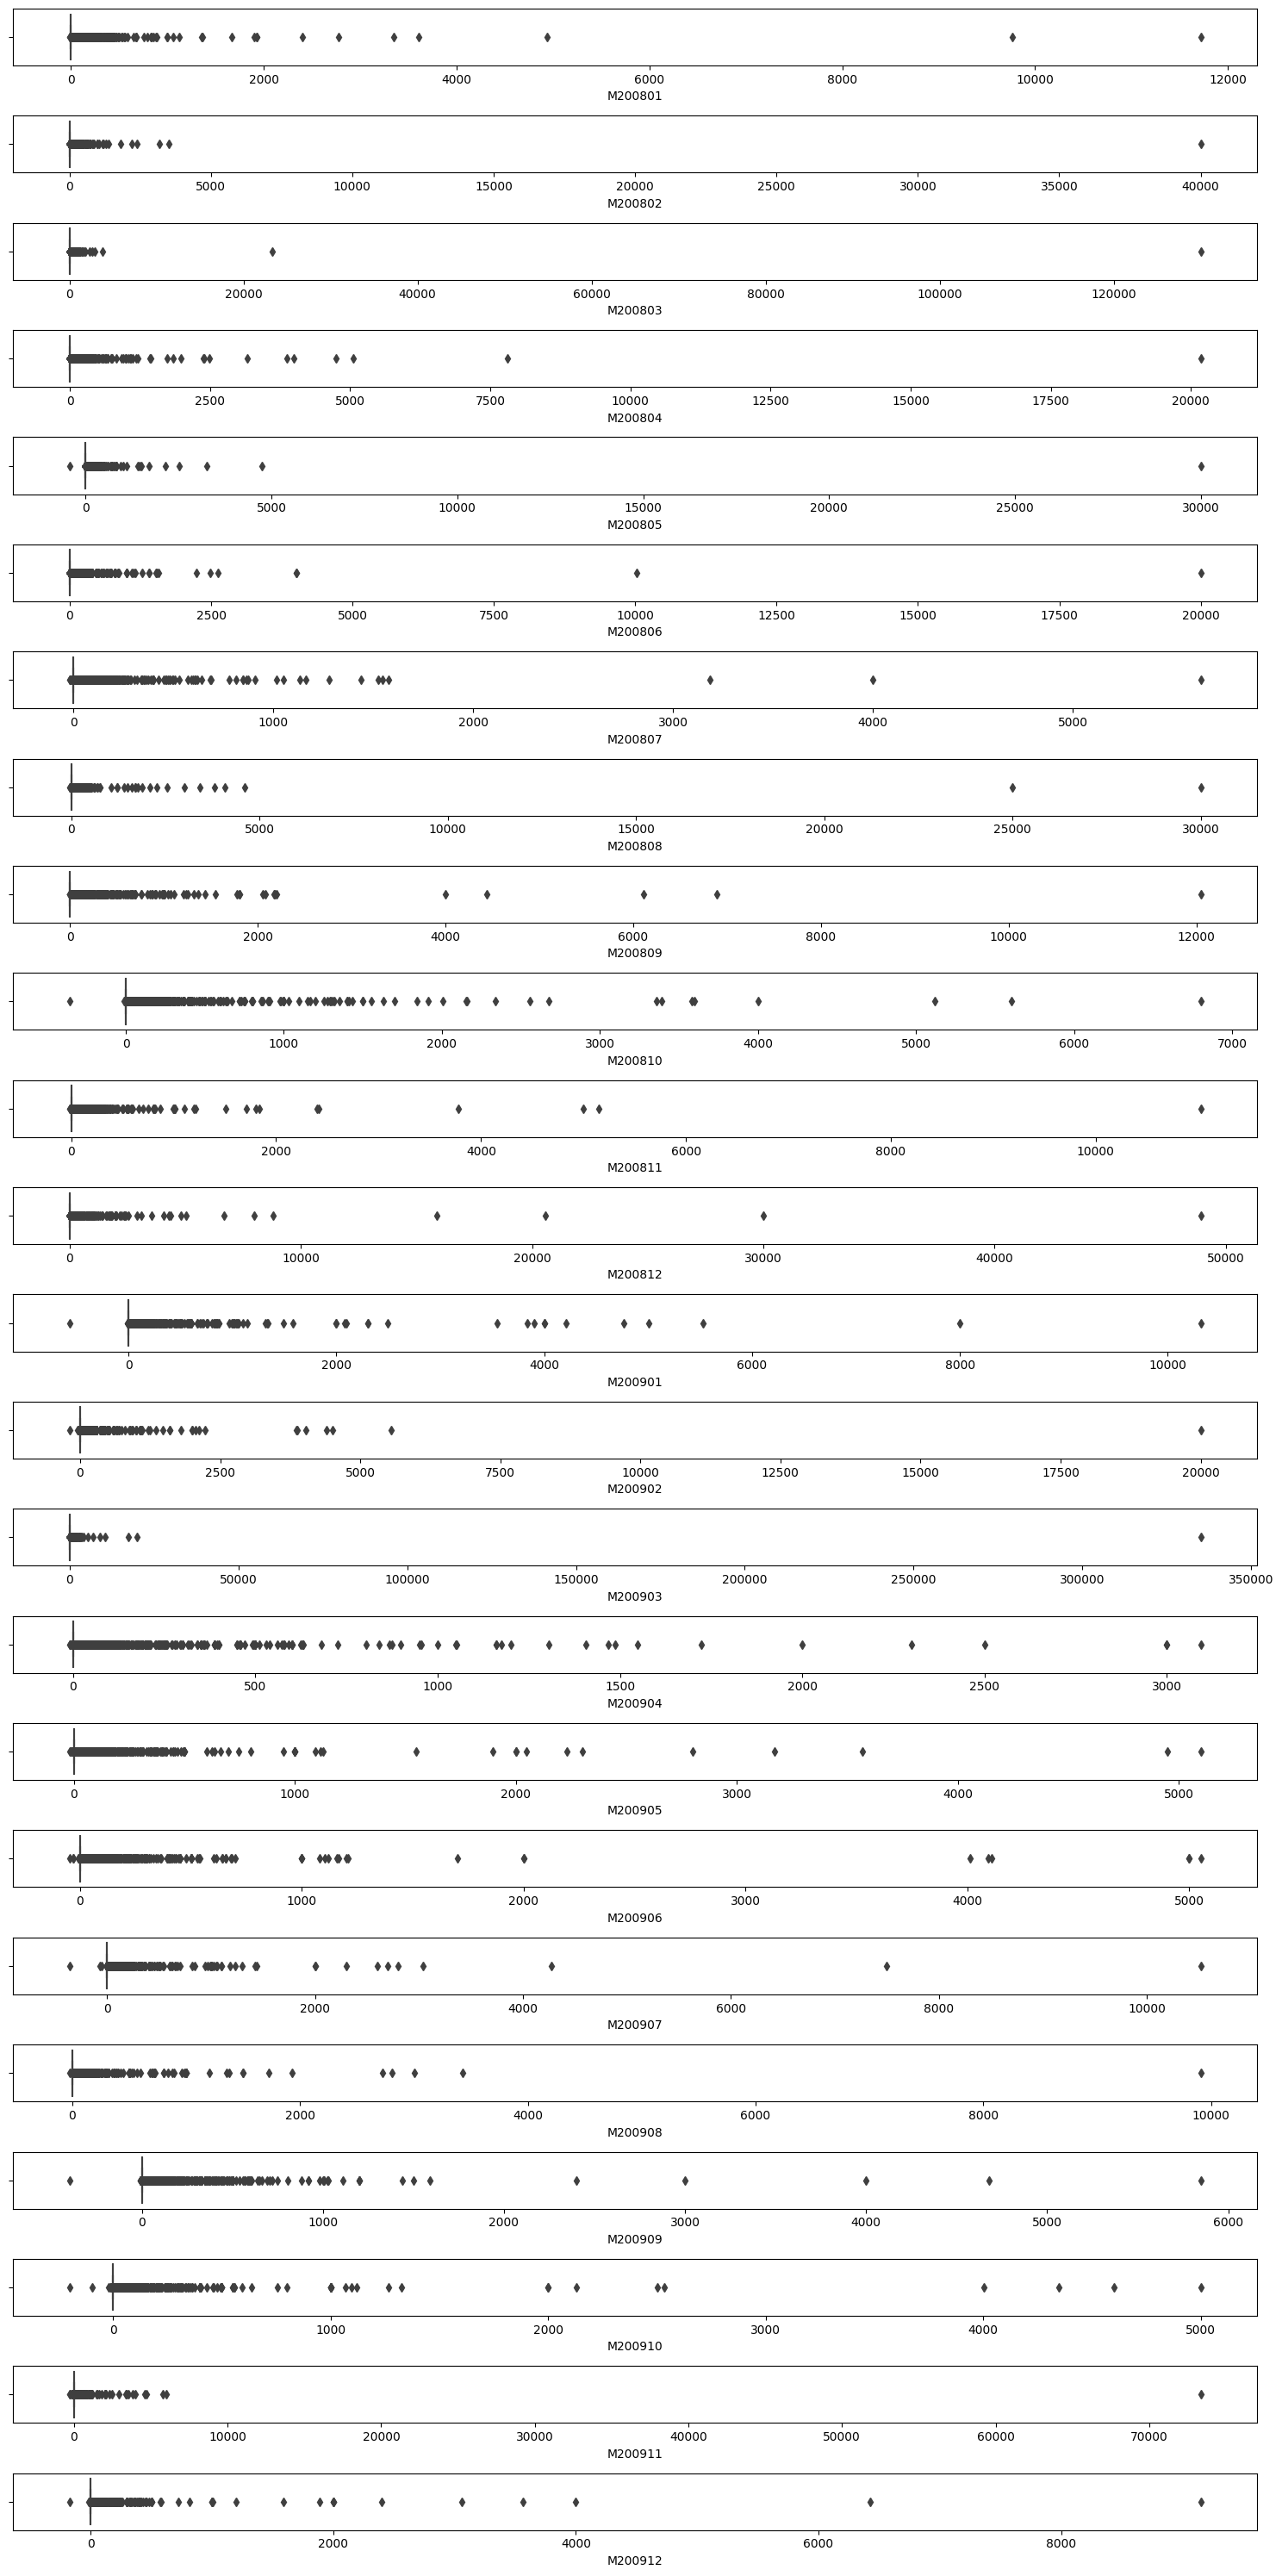

In [14]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[:24]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show()

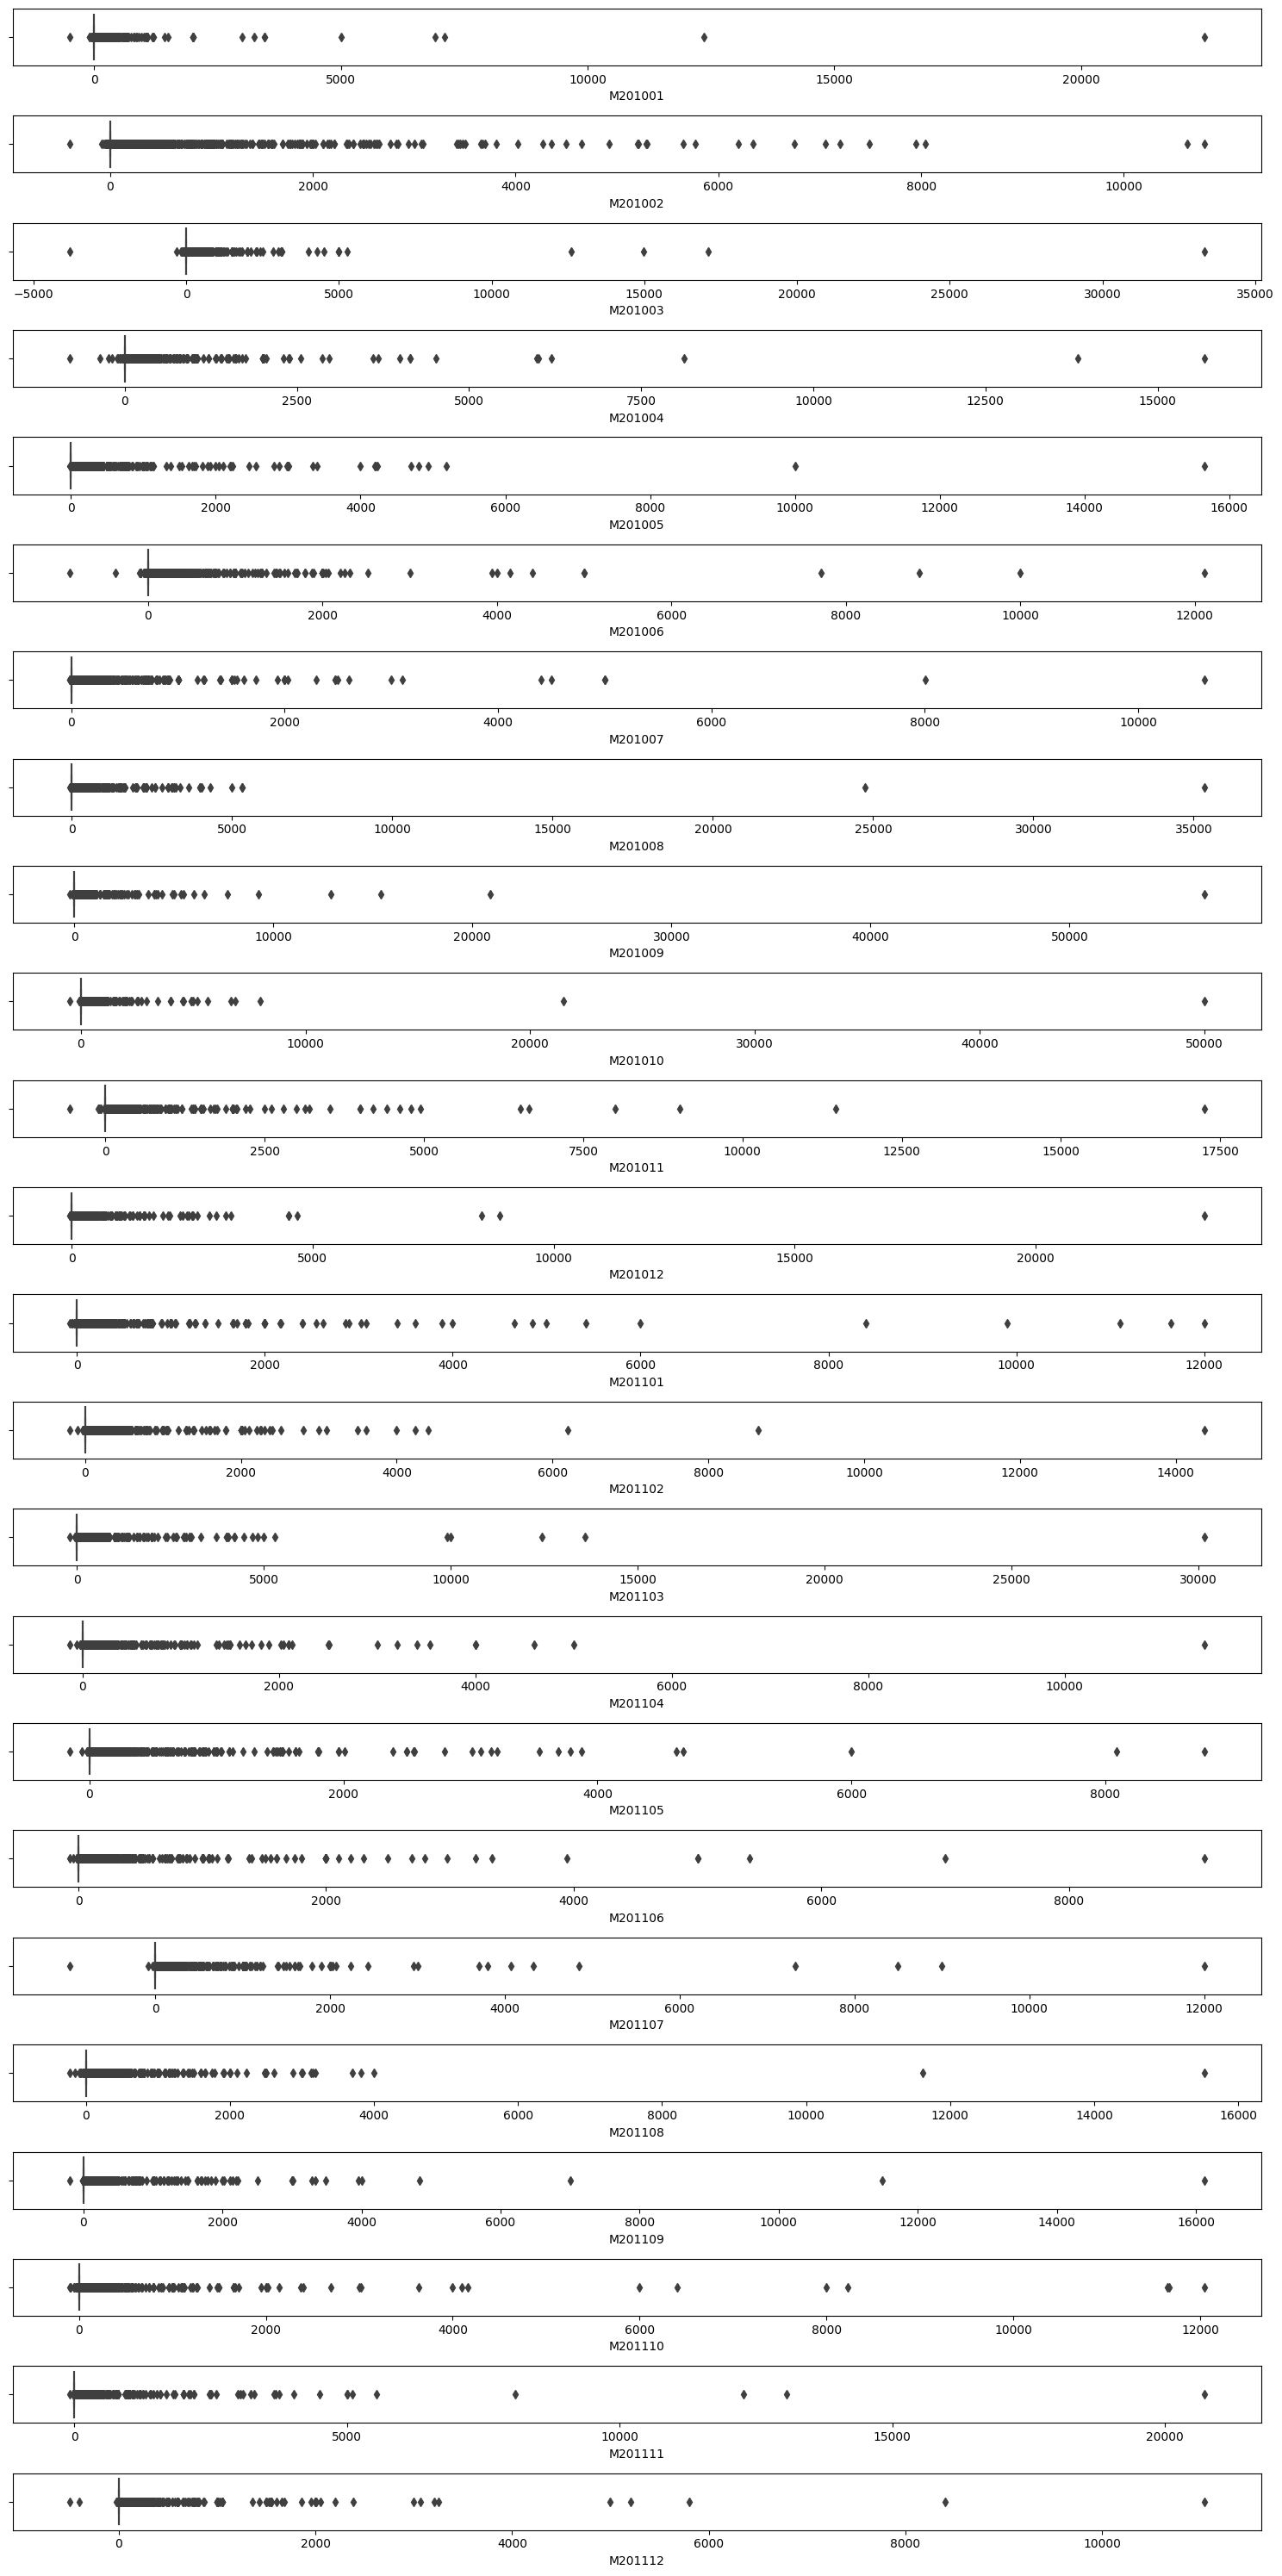

In [15]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[24:48]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show()

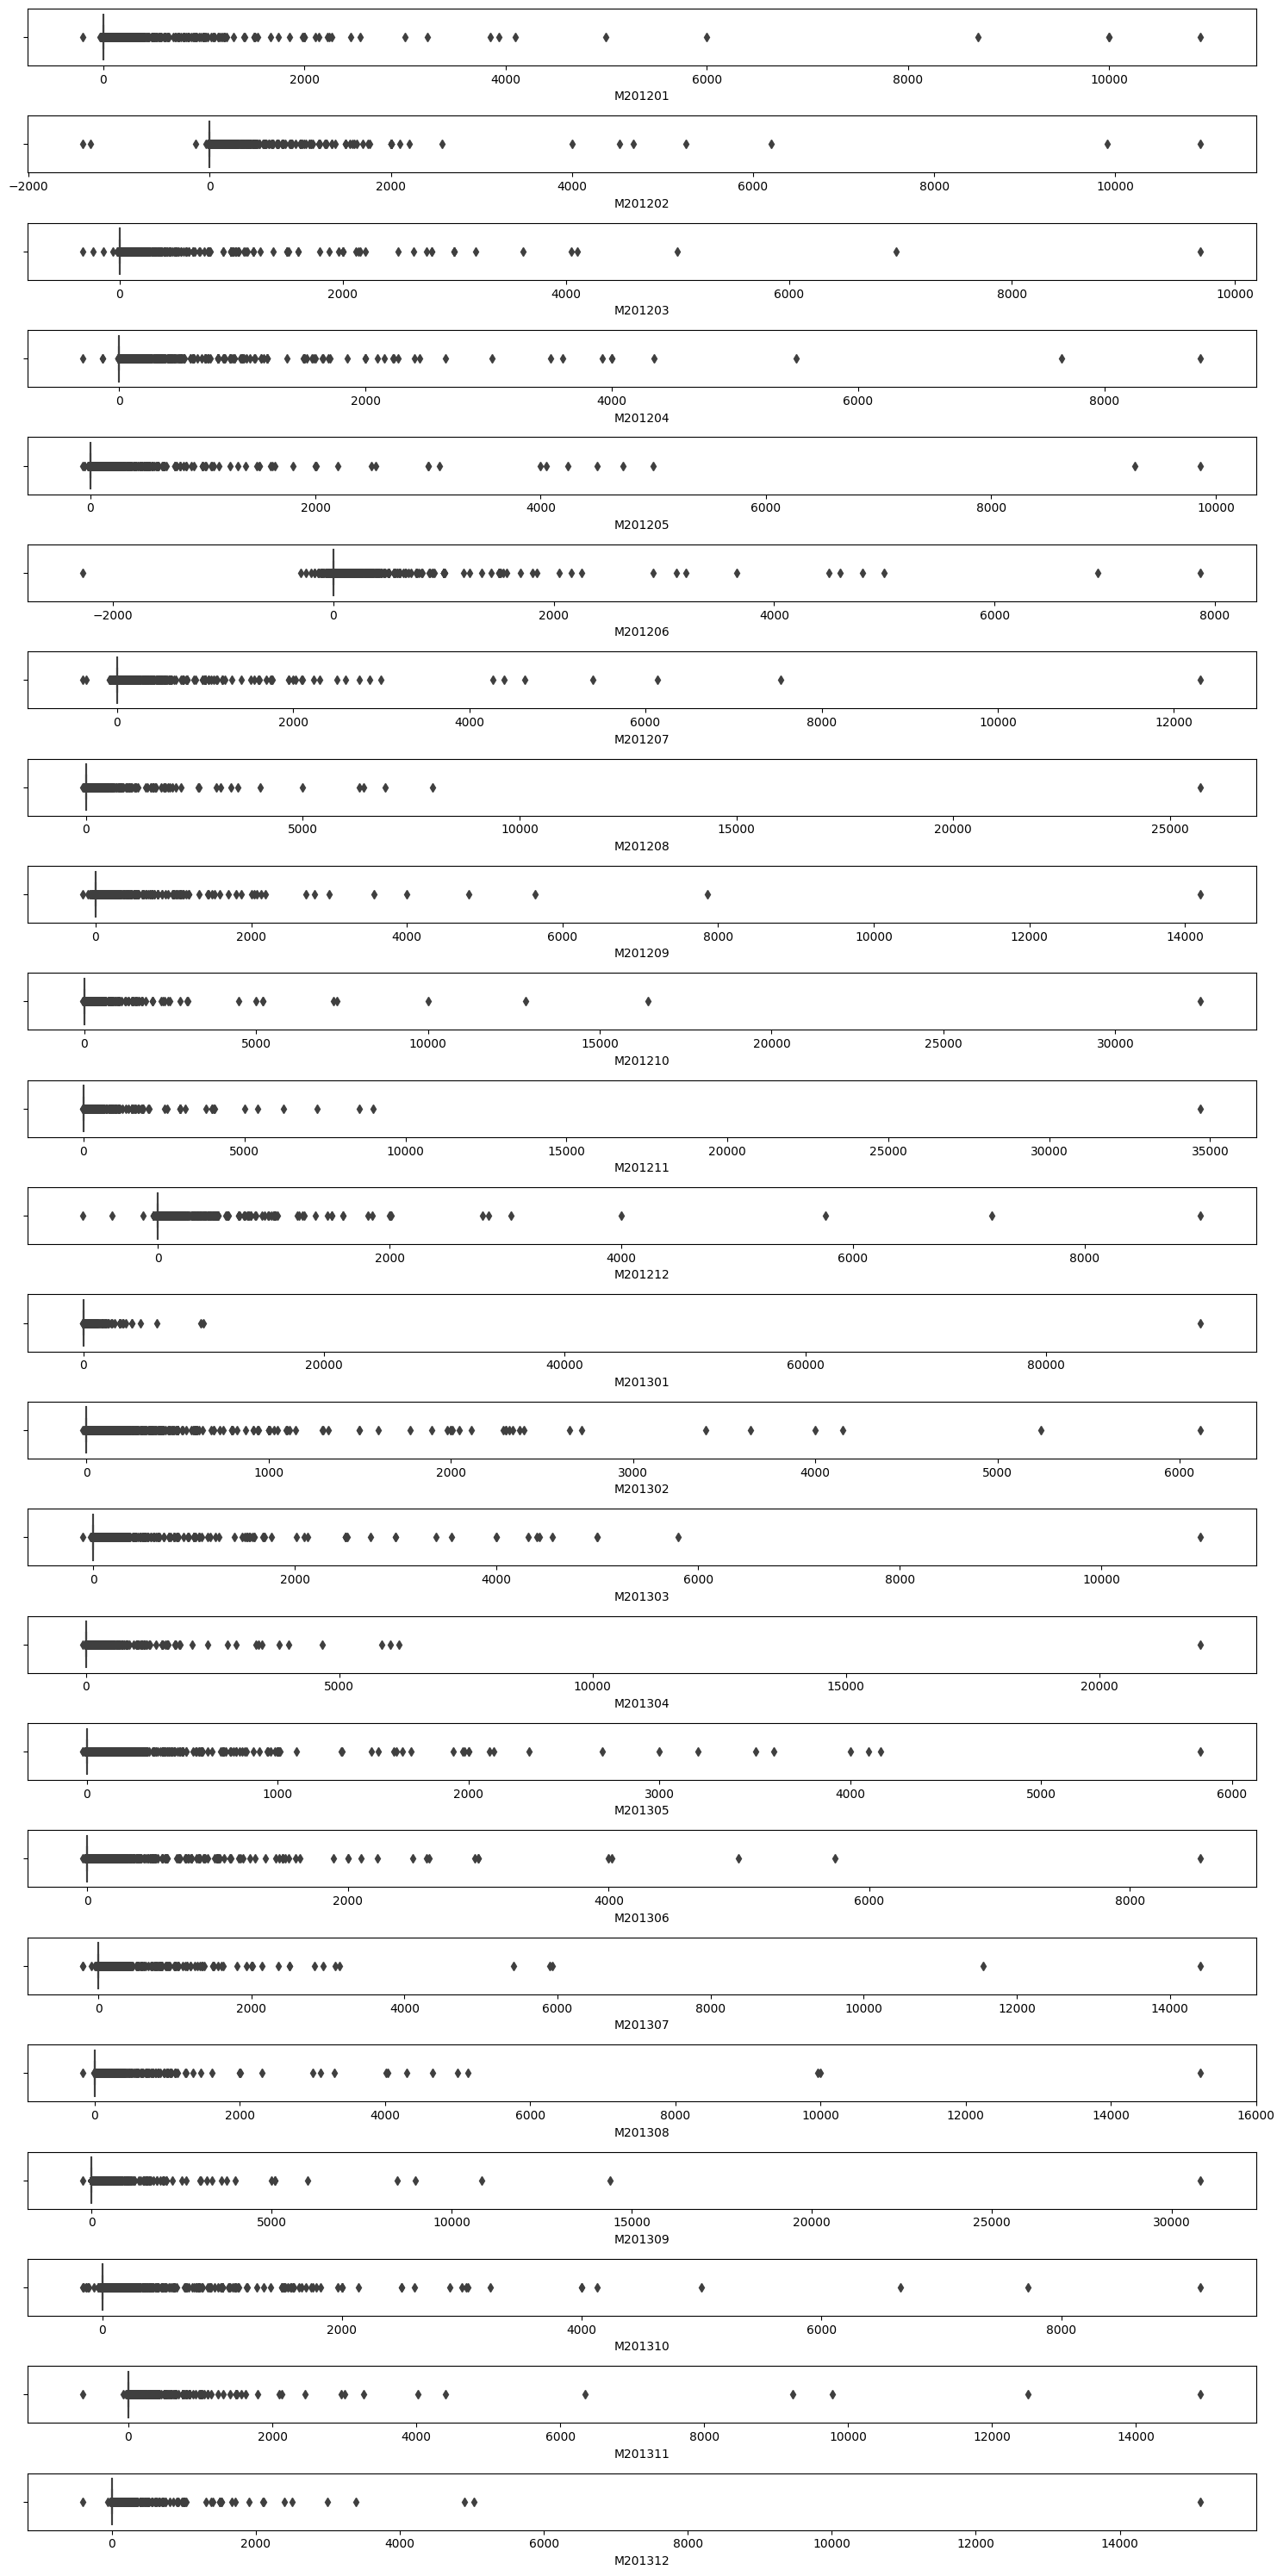

In [16]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[48:72]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show()

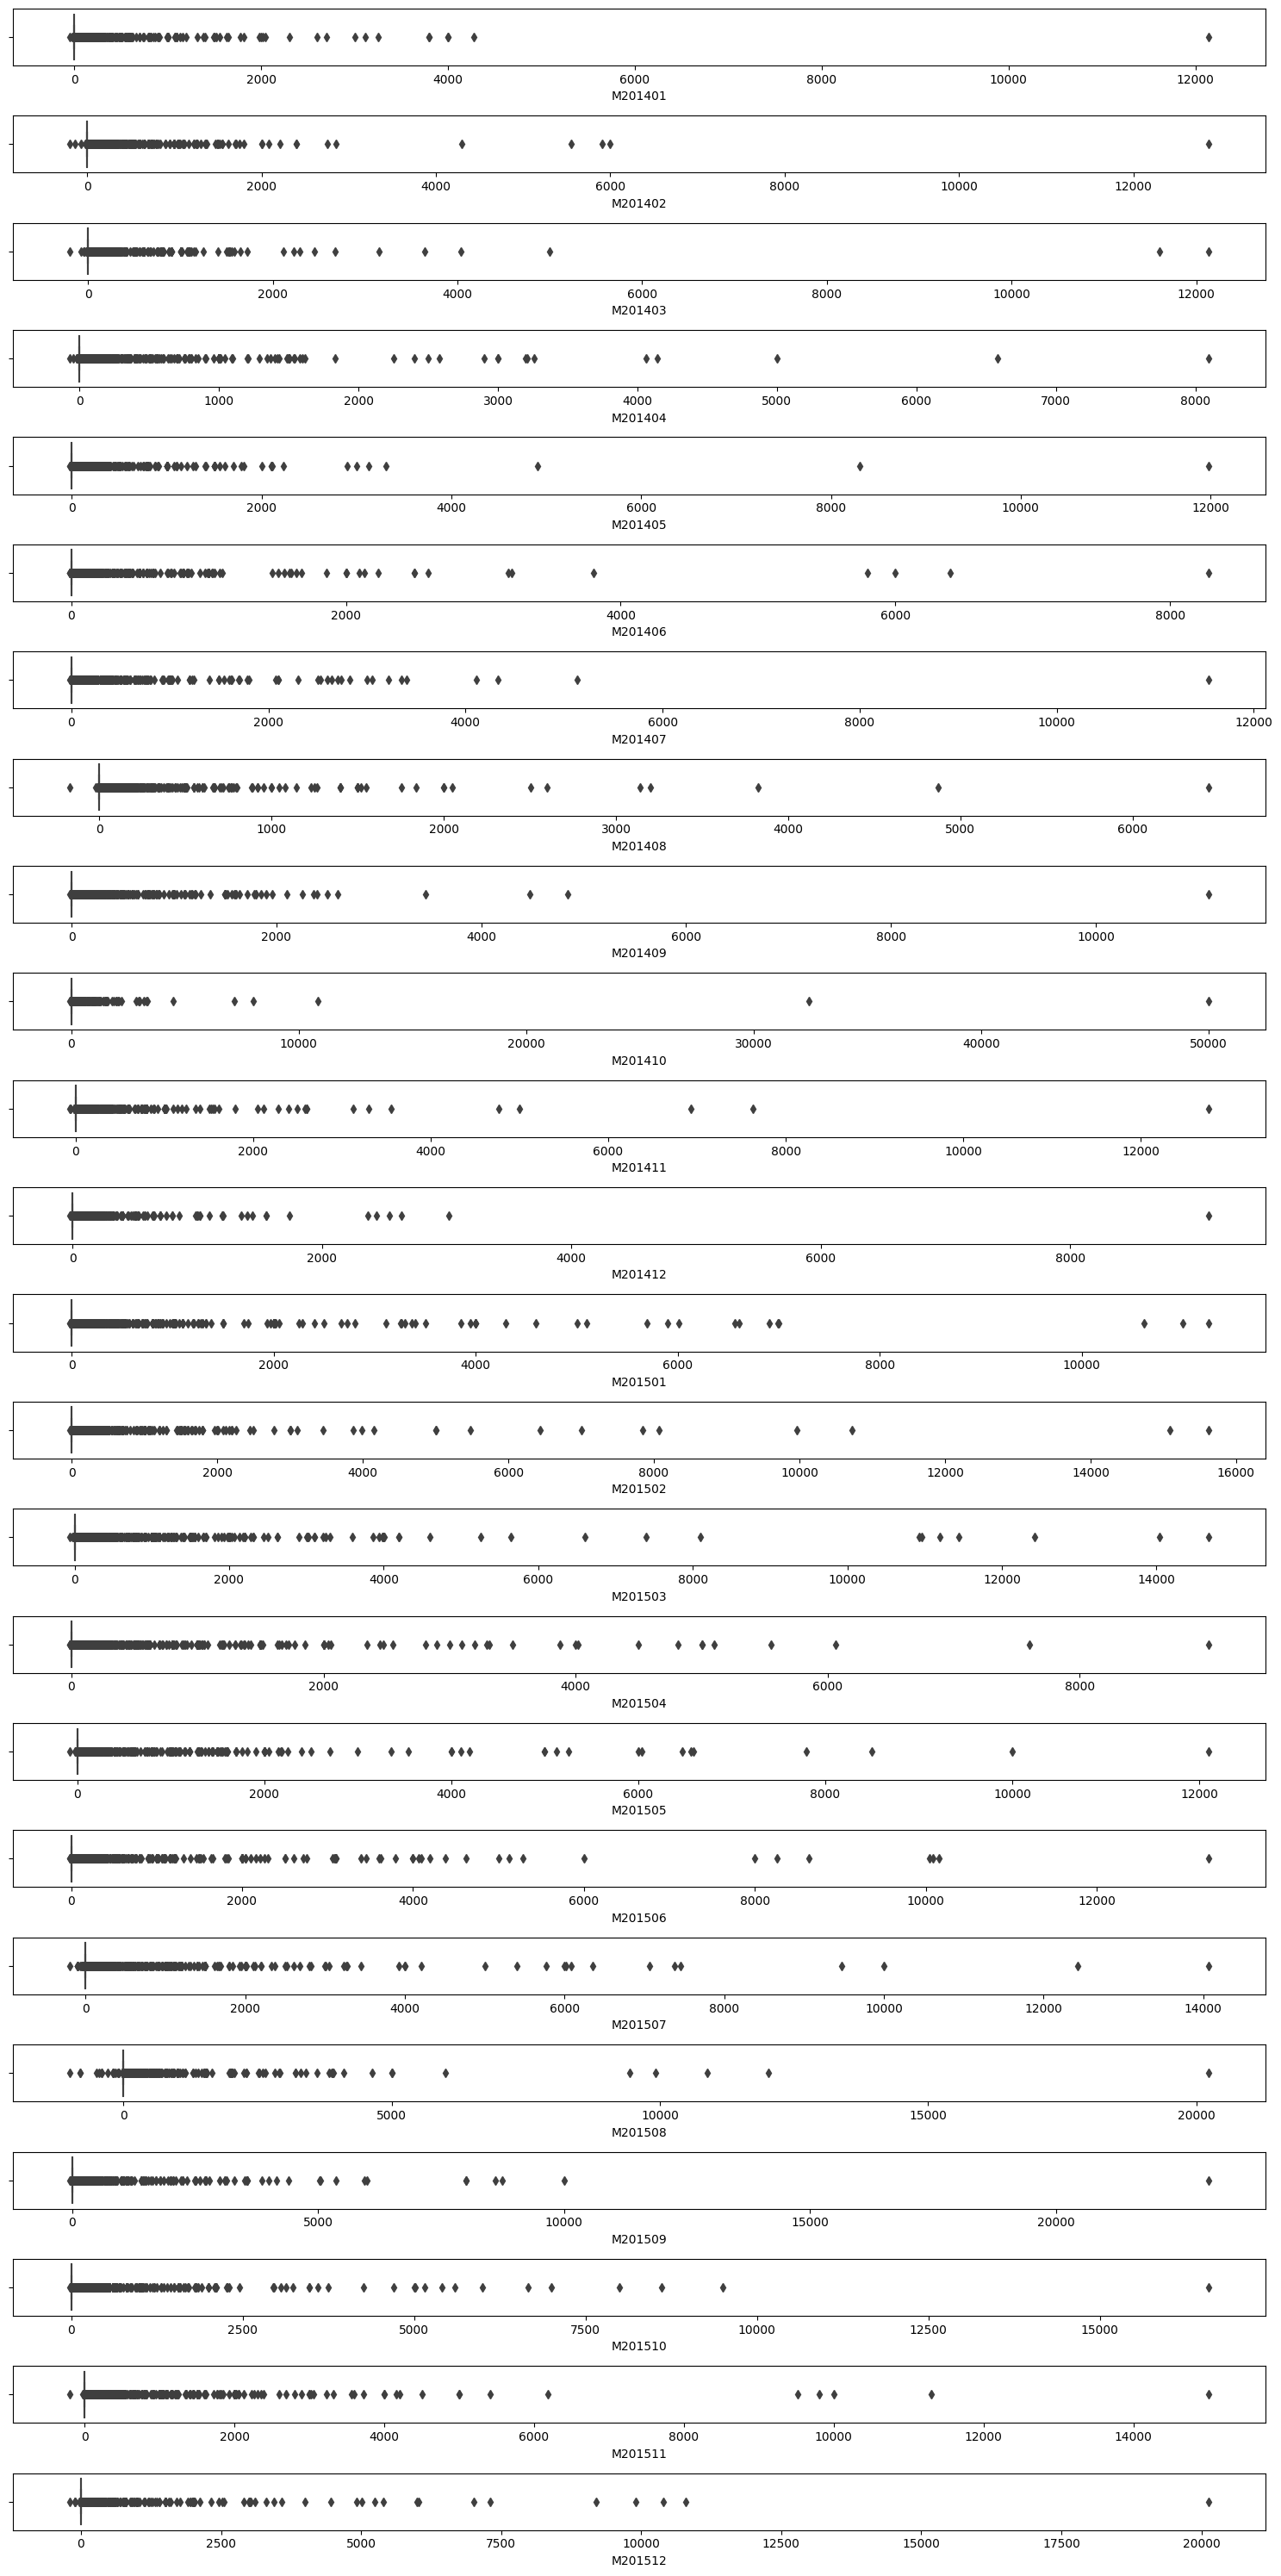

In [17]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[72:96]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show();

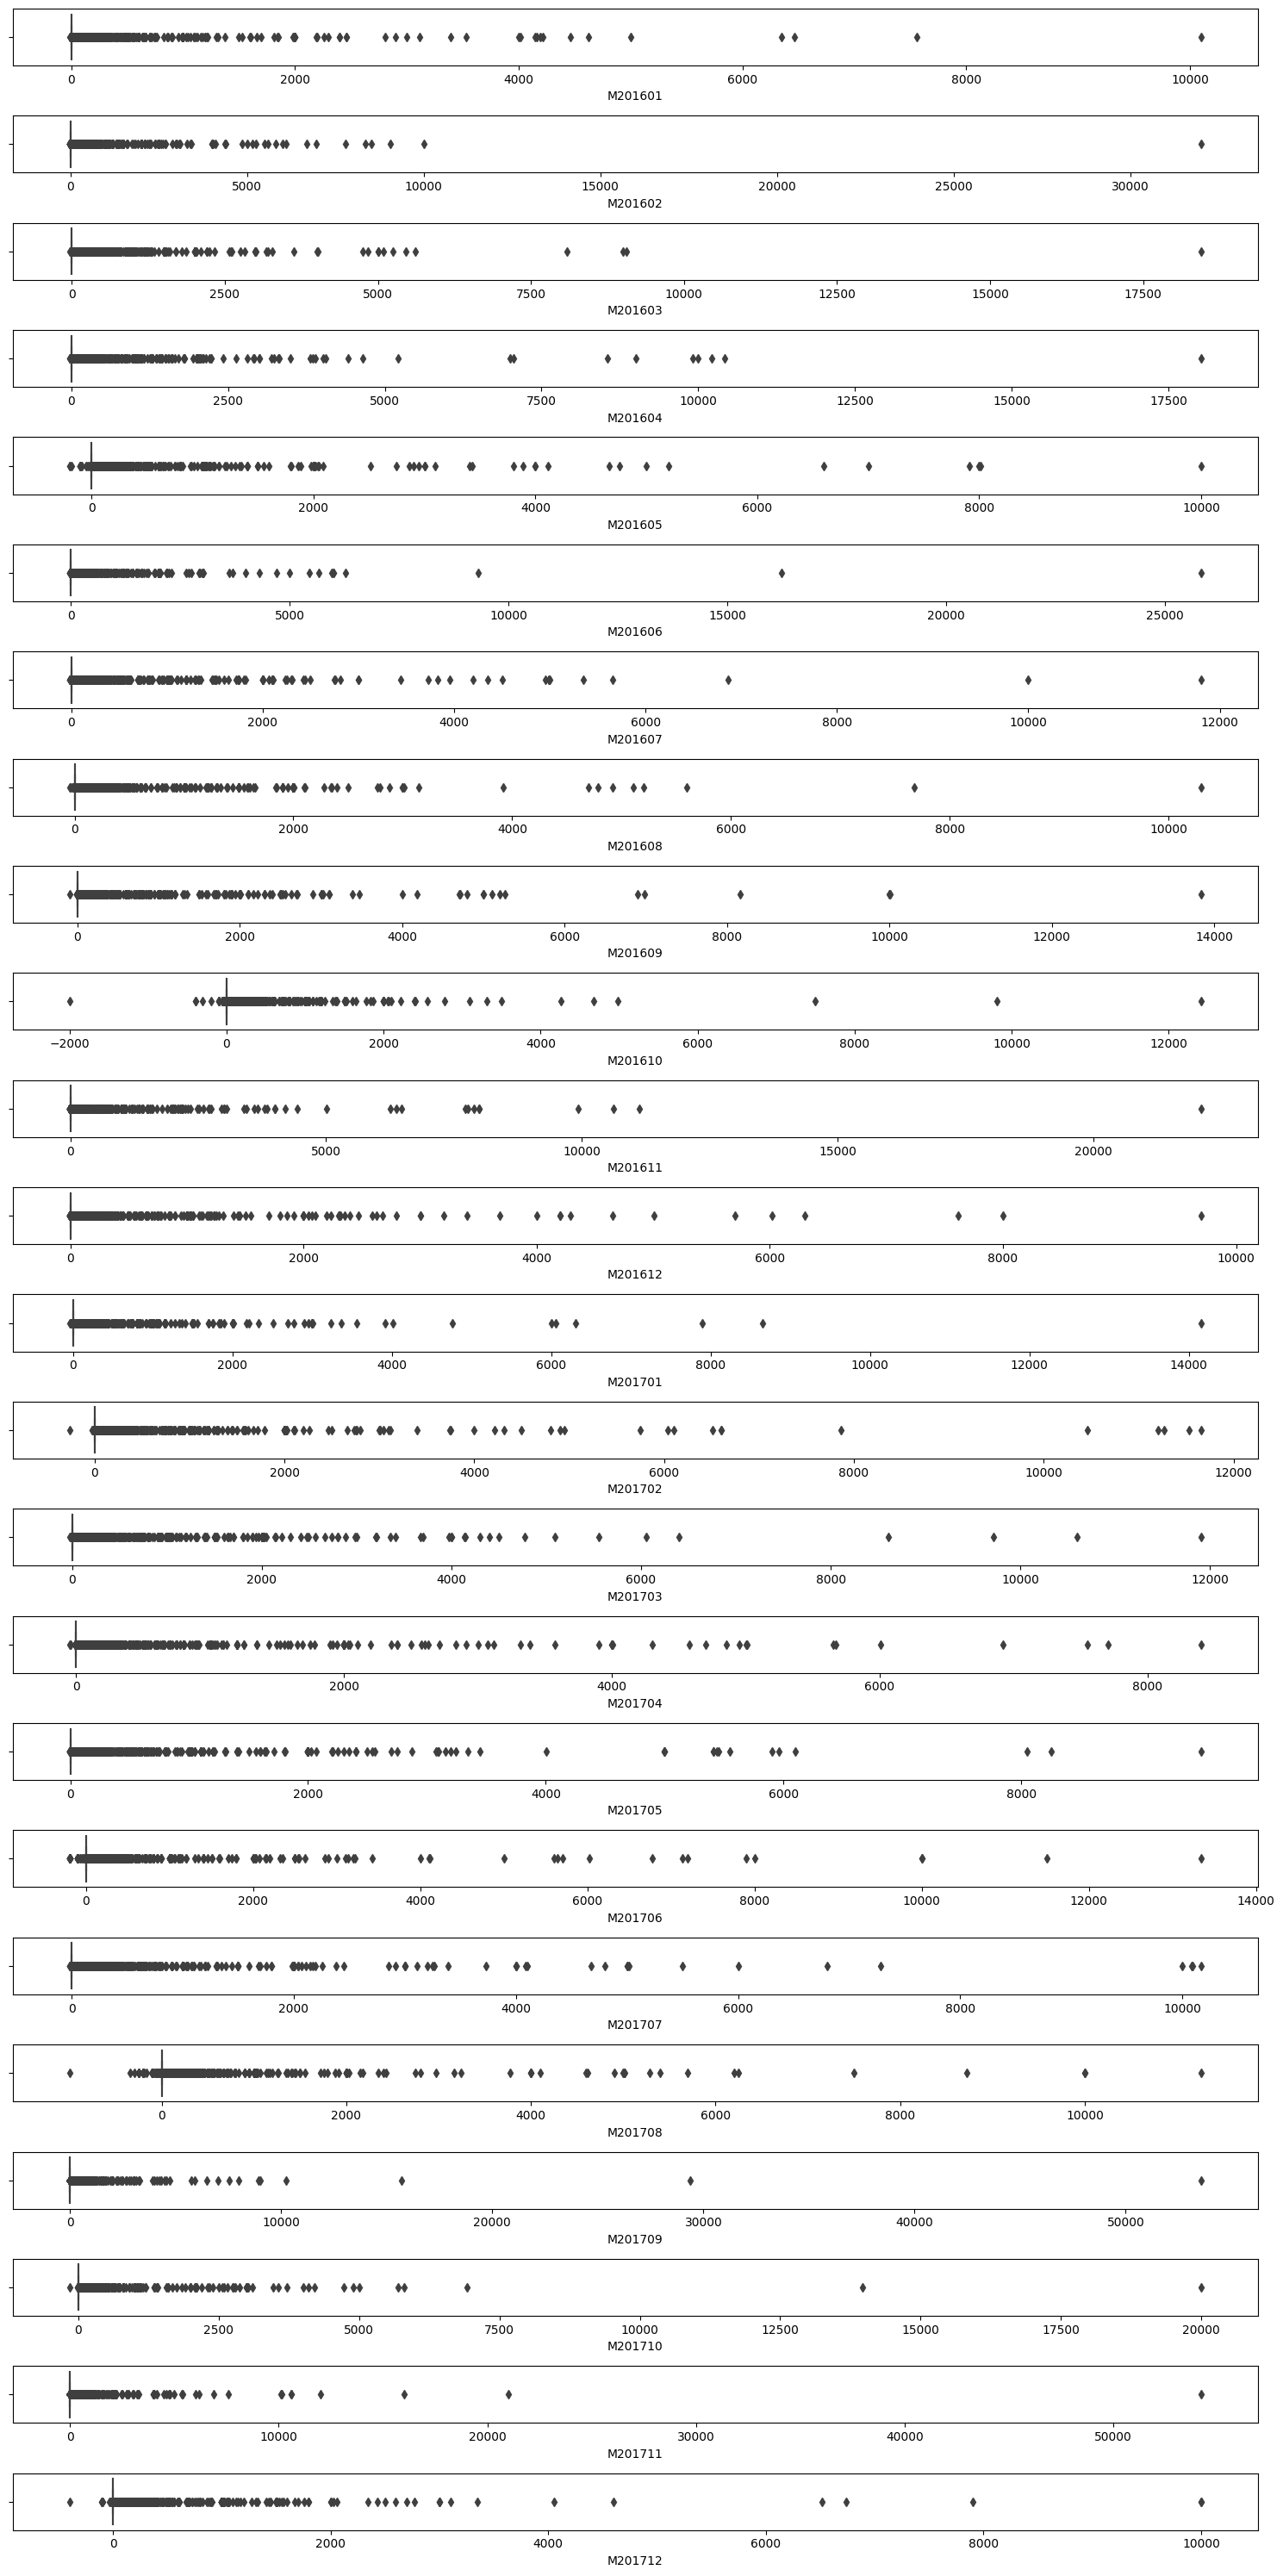

In [113]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[96:120]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show();

In [18]:
def plot_month(df, title=''):
    df = df[df.columns[df.columns.str.contains('M20')]]
    sum_month = df.sum(axis=0)
    month = np.array([datetime.strptime(date,'M%Y%m').date() for date in sum_month.index])
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(month, sum_month.values);

In [19]:
def plot_month_mean(df, title=''):
    df = df[df.columns[df.columns.str.contains('M20')]]
    sum_month = df.mean(axis=0)
    month = np.array([datetime.strptime(date,'M%Y%m').date() for date in sum_month.index])
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(month, sum_month.values);

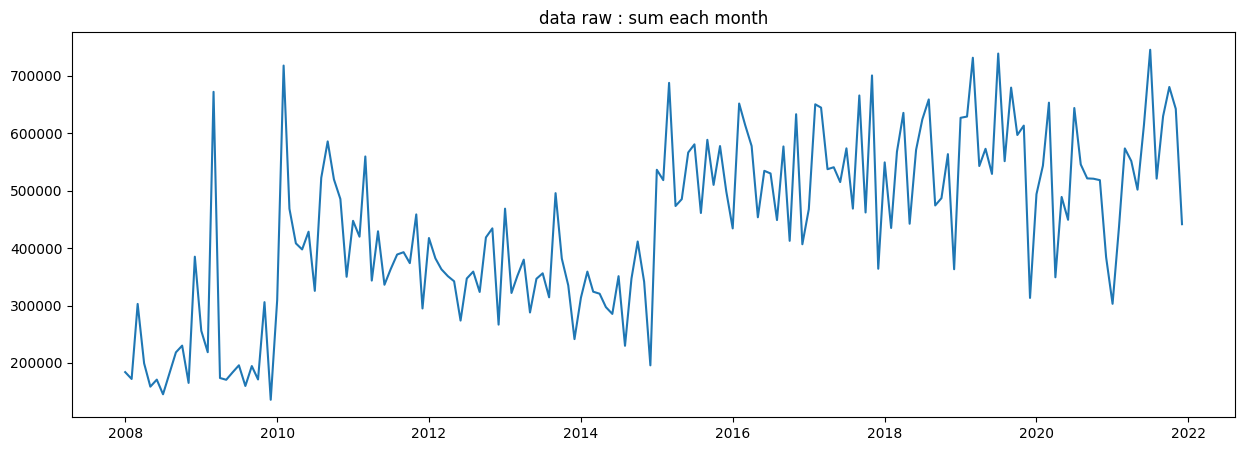

In [20]:
plot_month(data_raw,'data raw : sum each month')

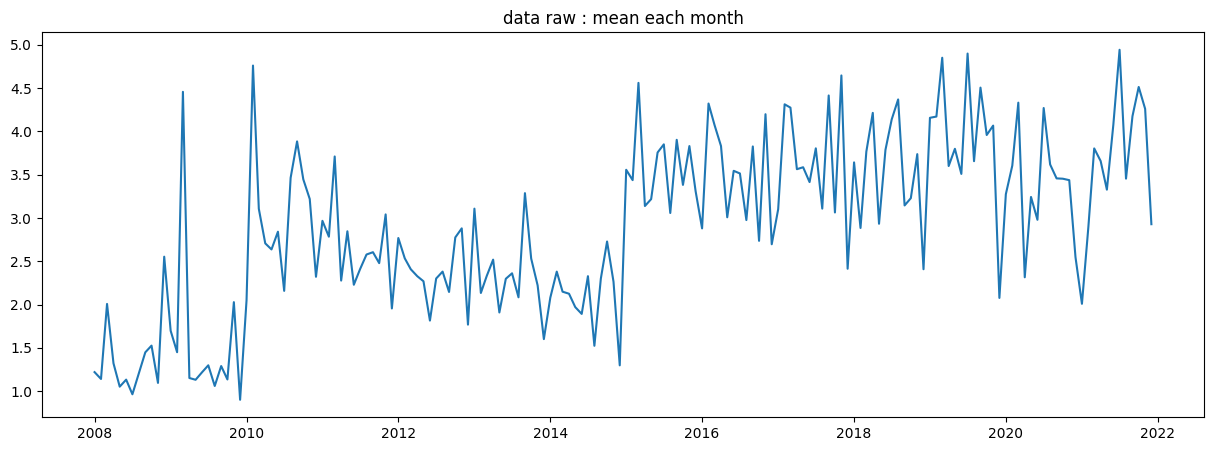

In [21]:
plot_month_mean(data_raw,'data raw : mean each month')

In [22]:
df.index.sort_values()[:10]

Int64Index([139437620, 218348584, 226995914, 234348706, 412715610, 424887997,
            430685480, 472376136, 510453260, 715246444],
           dtype='int64', name='MatNr_n')

In [23]:
df_sort = df.sort_index().copy()

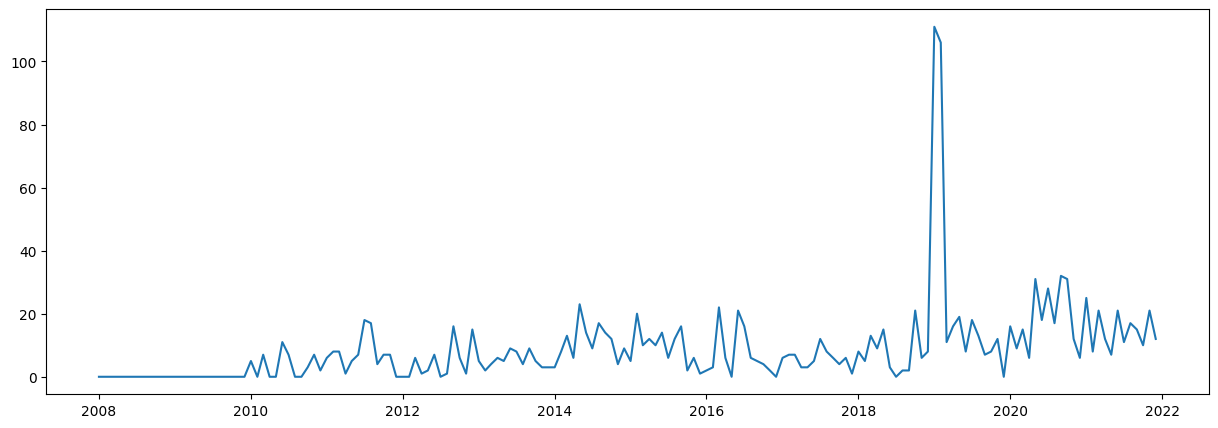

In [24]:
plot_month(df_sort[:10])

In [25]:
len(str(df_sort.index))

445

In [26]:
df_sort['len_idx'] = df_sort.index

In [27]:
df_sort['len_idx']  = df_sort.apply(lambda row: len(str(row['len_idx'])), axis=1)

In [28]:
df_sort['len_idx'].value_counts()

13    135755
12     13529
11      1360
10       153
9         13
Name: len_idx, dtype: int64

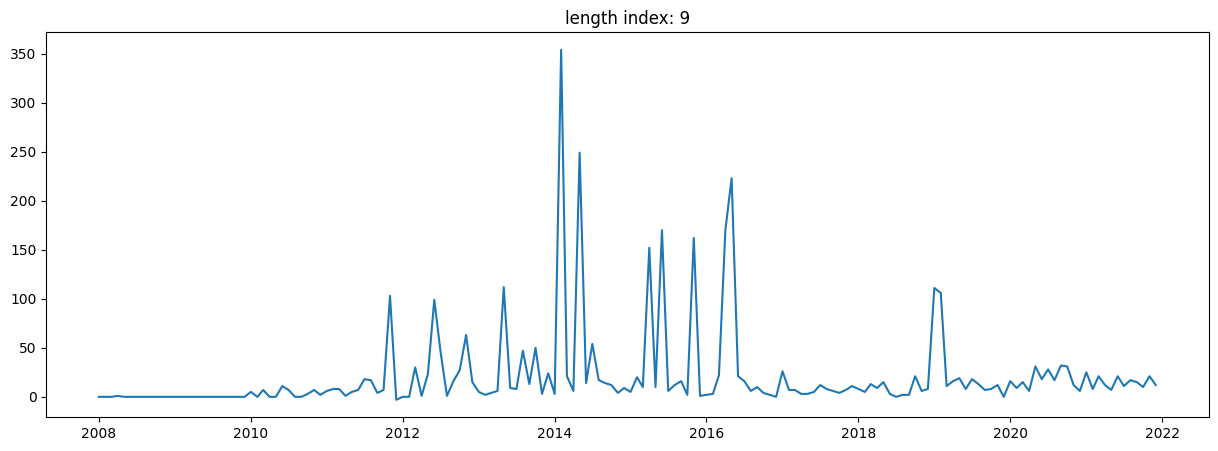

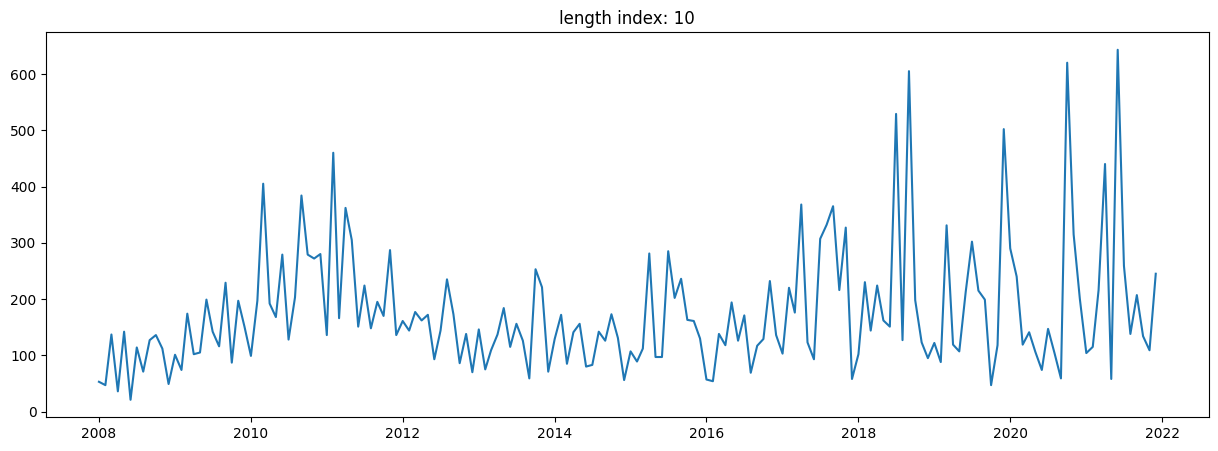

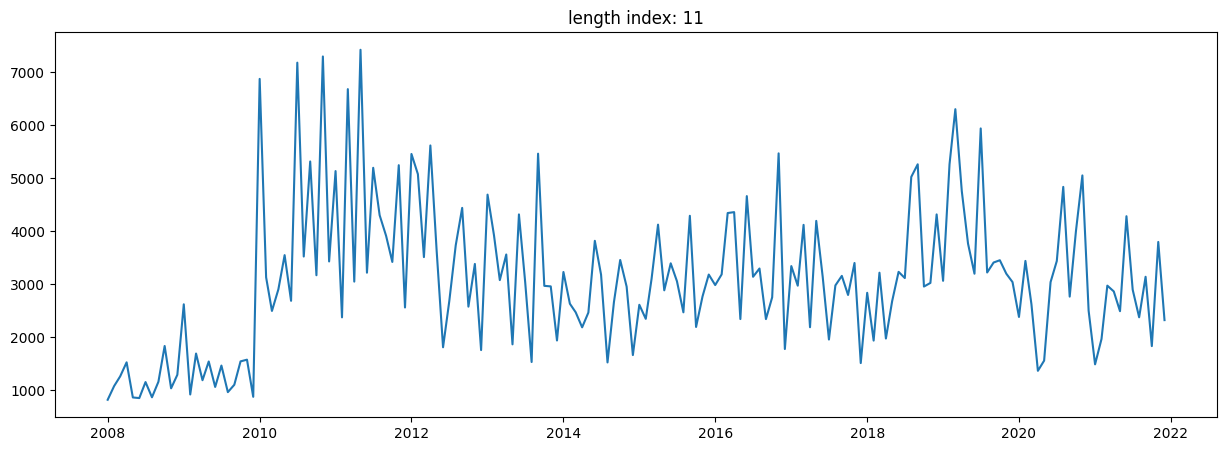

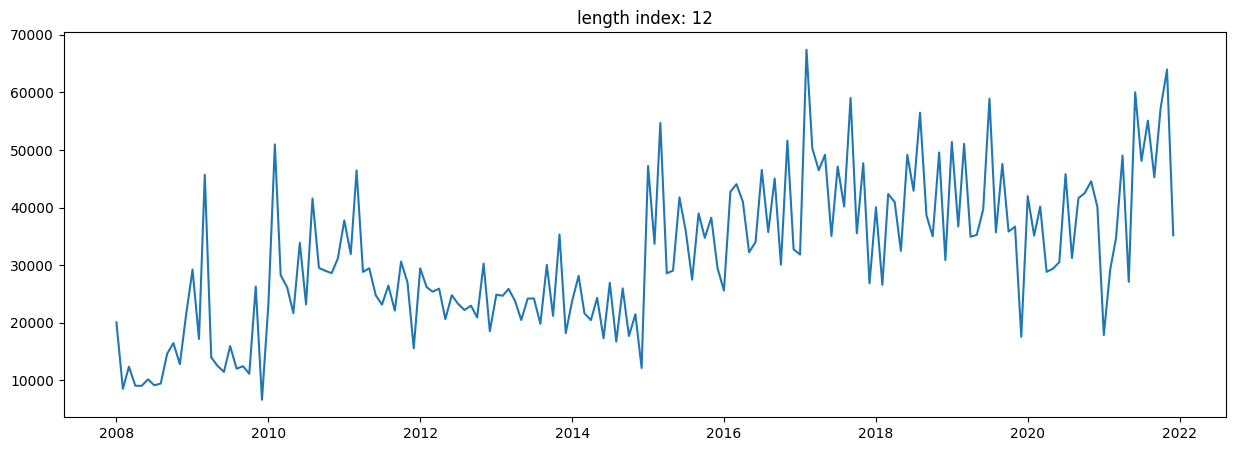

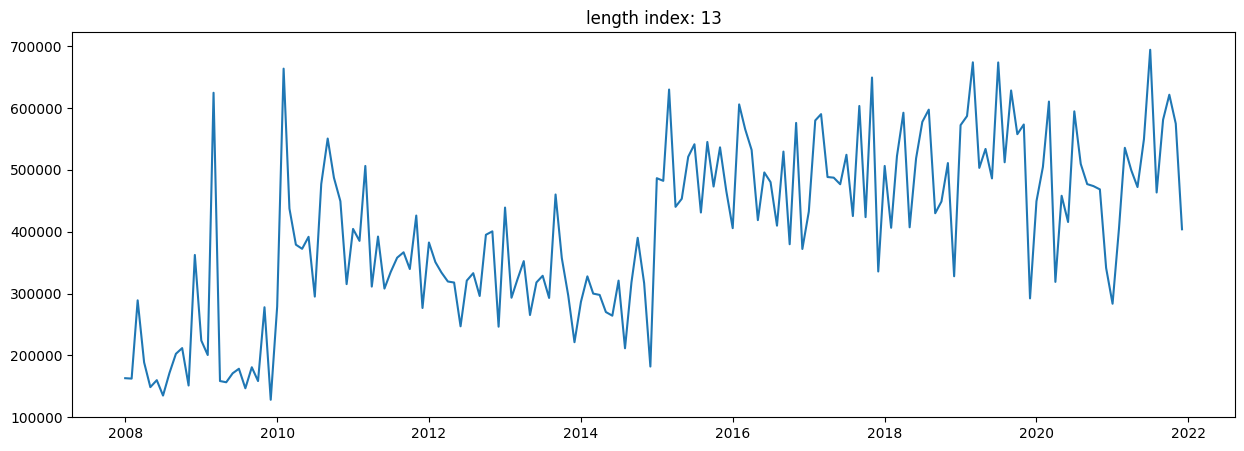

In [29]:
for i in range(9, 14):
    plot_month(df_sort[df_sort['len_idx'] == i], f"length index: {i}")

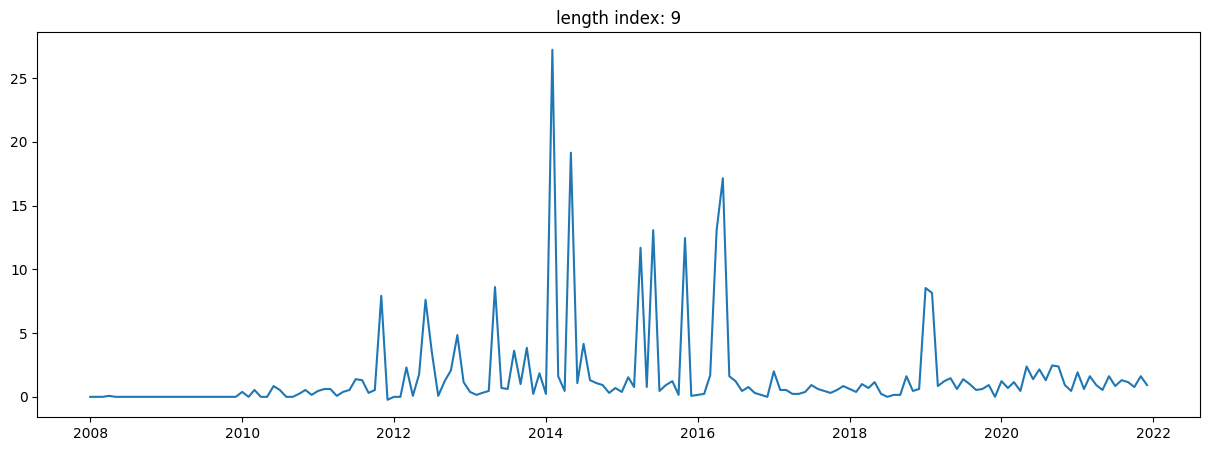

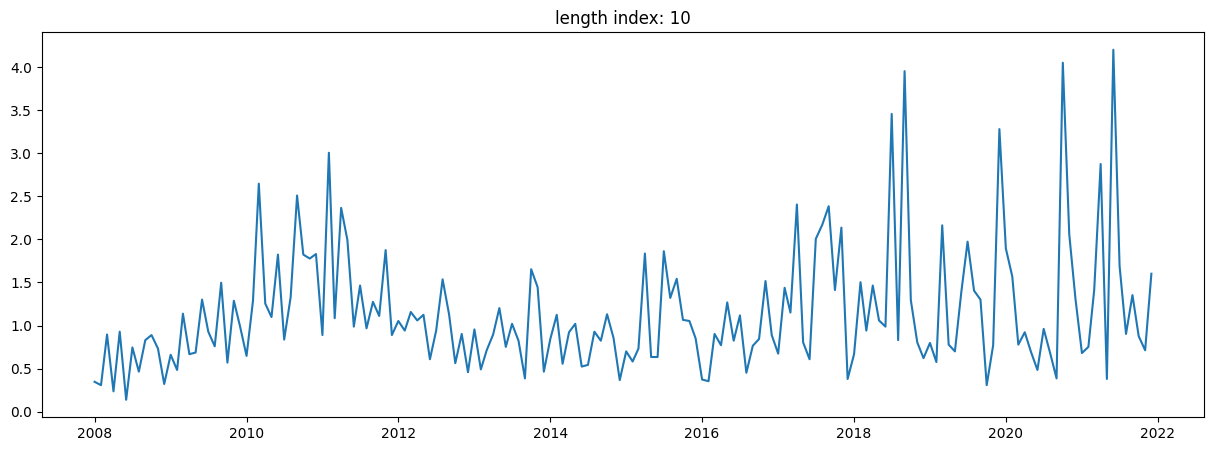

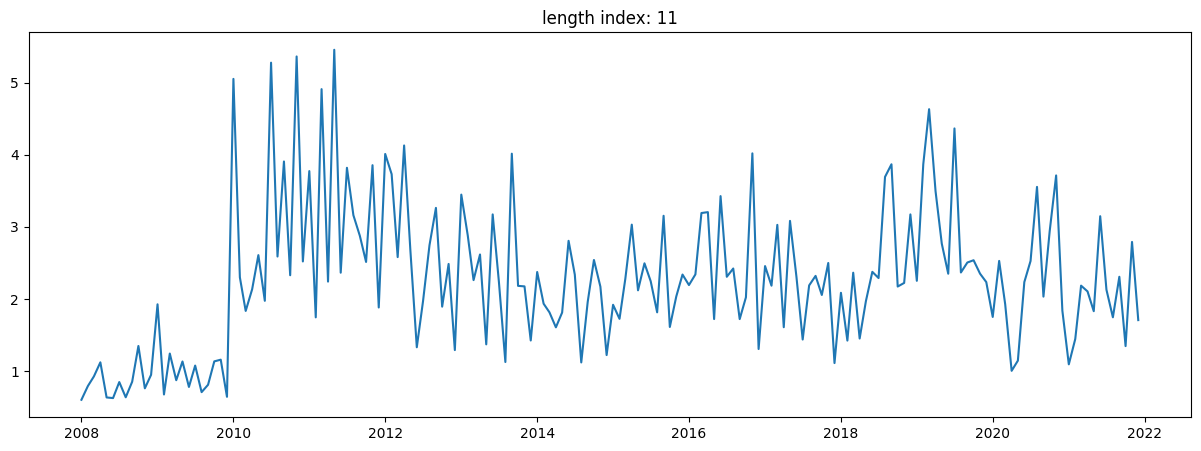

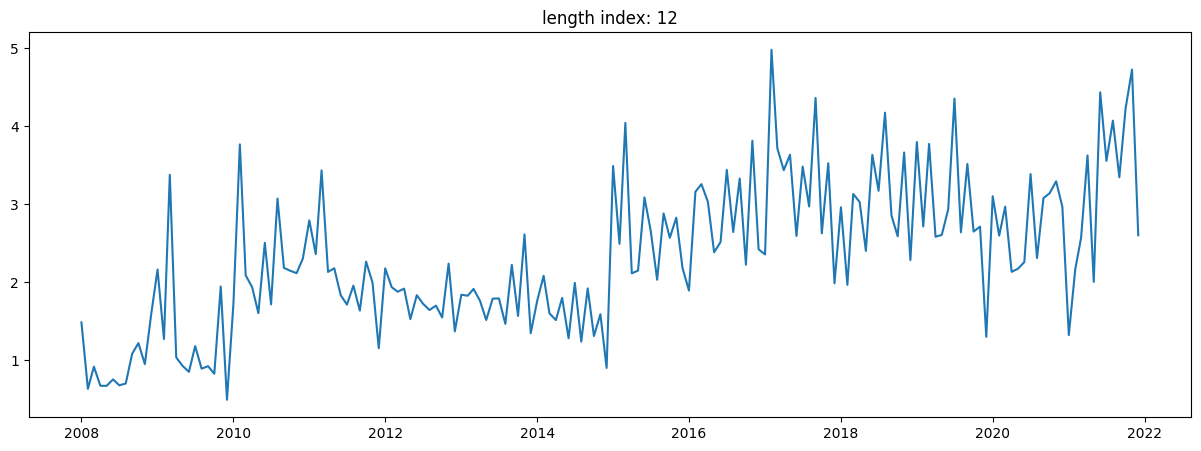

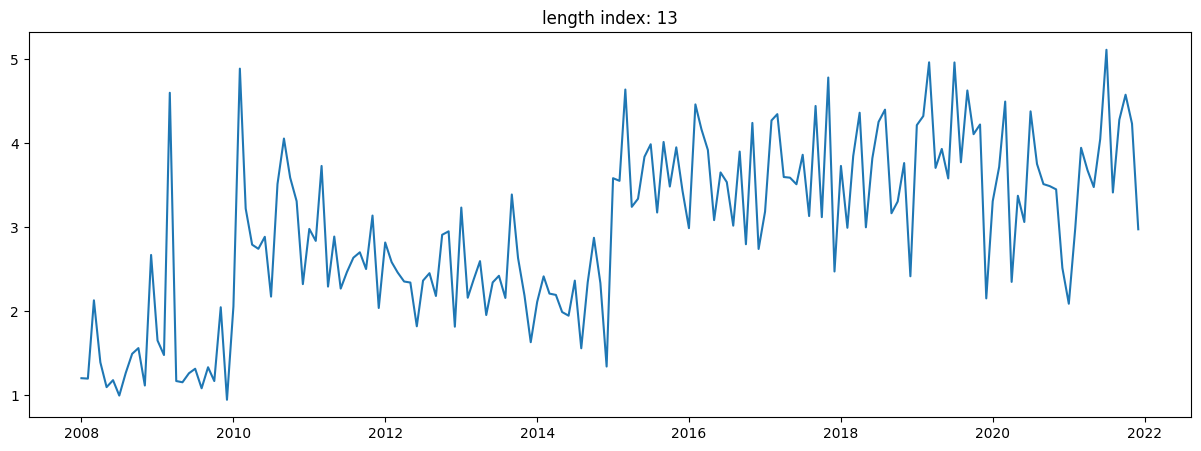

In [30]:
for i in range(9, 14):
    plot_month_mean(df_sort[df_sort['len_idx'] == i], f"length index: {i}")

## Data processing

### change negative value

In [31]:
df[df < 0] = 0

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
M200801,150810.0,1.220377,47.482262,0.0,0.0,0.0,0.0,11717.0
M200802,150810.0,1.141264,105.050201,0.0,0.0,0.0,0.0,40000.0
M200803,150810.0,2.007944,340.890353,0.0,0.0,0.0,0.0,130000.0
M200804,150810.0,1.322207,64.197082,0.0,0.0,0.0,0.0,20176.0
M200805,150810.0,1.055606,80.361102,0.0,0.0,0.0,0.0,30000.0
...,...,...,...,...,...,...,...,...
M202108,150810.0,3.457735,105.413597,0.0,0.0,0.0,0.0,20000.0
M202109,150810.0,4.179139,84.092593,0.0,0.0,0.0,0.0,10536.0
M202110,150810.0,4.516153,138.704015,0.0,0.0,0.0,0.0,40000.0
M202111,150810.0,4.261972,92.961310,0.0,0.0,0.0,0.0,16000.0


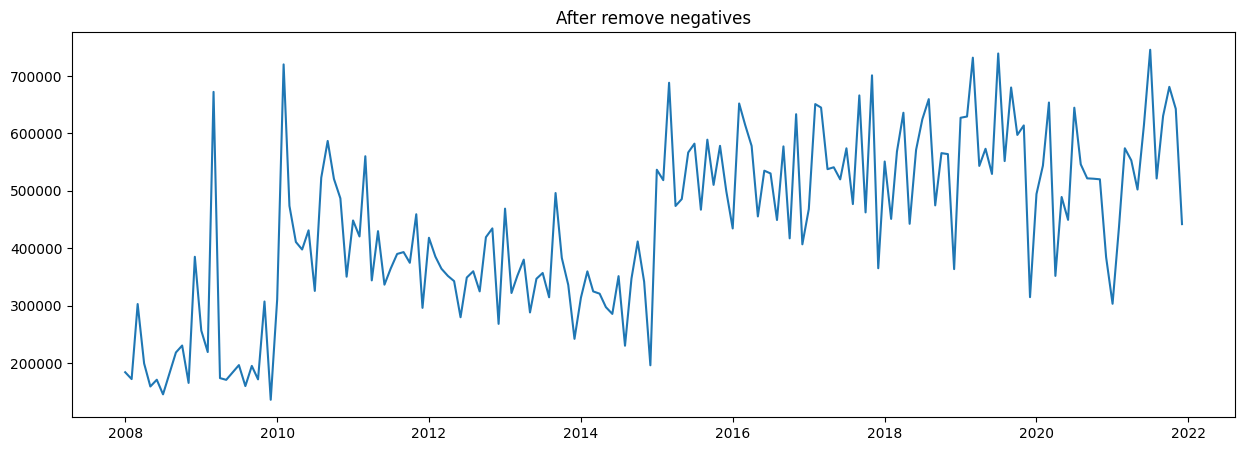

In [33]:
plot_month(df,'After remove negatives')

In [34]:
index = np.random.choice(range(len(df)))
index

123742

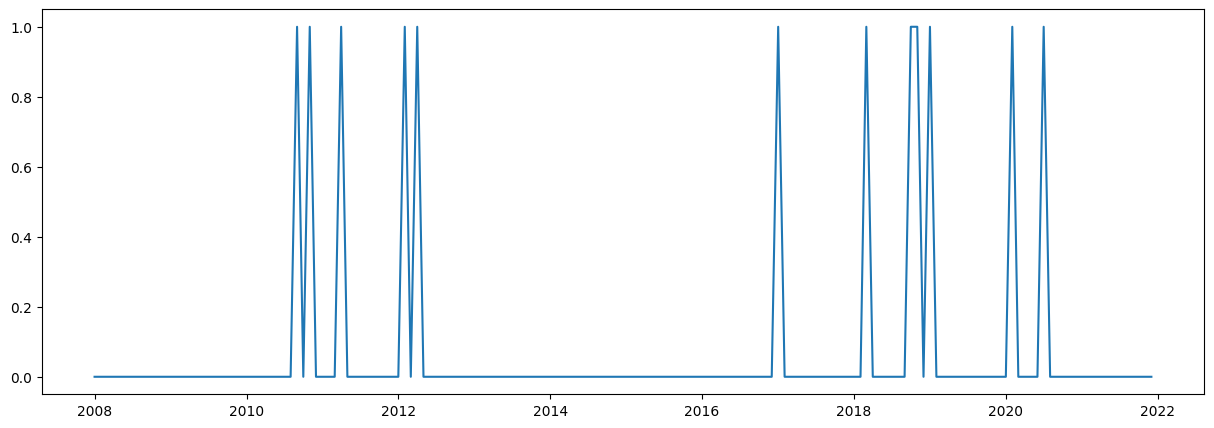

In [35]:
plot_month(df.iloc[[index]])

In [36]:
df[df['M202108'] > 10000]

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
994439189419,0,2,106,16,283,0,5,0,0,0,...,0,0,0,2400,220,20000,0,0,35,0
1009770854891,10,4,122,6,14,6,1,74,6,8,...,1715,2235,5689,3281,3717,11142,4889,5635,1953,976
8043155656563,11717,60,4,26,19,6,3,139,6,16,...,3301,5653,1410,6140,1787,14144,1842,1419,5546,3802
9498770756642,0,0,0,0,0,20,0,0,0,0,...,0,0,0,0,0,20000,0,0,0,0


In [37]:
df_sort[df_sort['len_idx'] == 13].index

Int64Index([1000031385820, 1000121644949, 1000143014147, 1000201752663,
            1000221617774, 1000300184149, 1000381800605, 1000407239681,
            1000590021055, 1000592069965,
            ...
            9999339471240, 9999361967337, 9999504082509, 9999620749292,
            9999877915401, 9999878534731, 9999881715197, 9999945110327,
            9999945156893, 9999995732367],
           dtype='int64', name='MatNr_n', length=135755)

In [38]:
df_sort.to_csv('sort_df.csv')

## Split training and testing

In [39]:
cols_train = df.columns[:-12]
cols_test = df.columns[-12:]
df_train = df[cols_train].T
df_test = df[cols_test].T

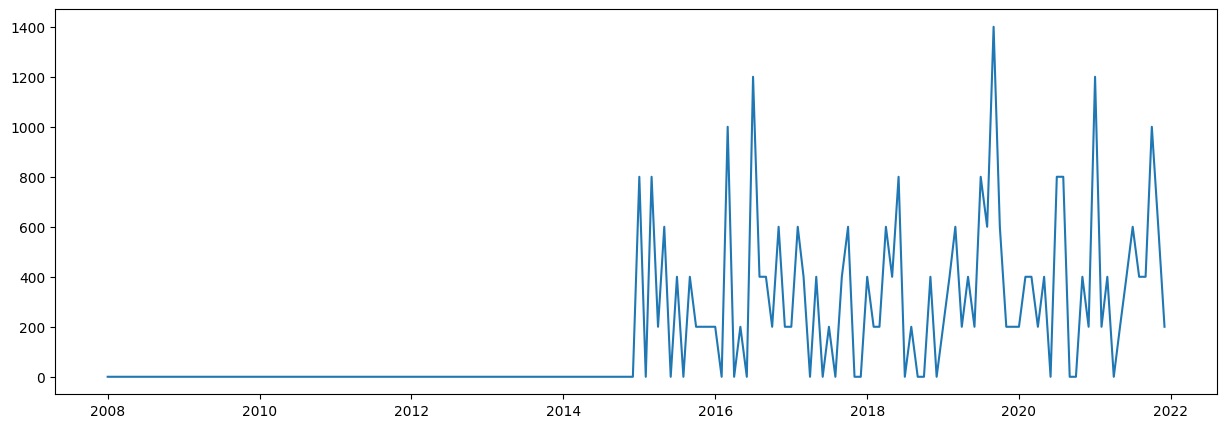

In [40]:
plot_month(df.loc[[5574758316533]])

## Build model base line

In [41]:
df_train.index = np.array([datetime.strptime(date,'M%Y%m').date() for date in df_train.index])

In [42]:
df_test.index = np.array([datetime.strptime(date,'M%Y%m').date() for date in df_test.index])

In [43]:
df_test

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2021-01-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
2021-02-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,3,0
2021-03-01,0,0,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2021-04-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
2021-07-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,2,0
2021-08-01,0,0,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,2,0,27,0
2021-09-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2021-10-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,4,0,9,0


In [44]:
df_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [45]:
X_train = df_train.copy()
X_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [46]:
df_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [47]:
## rolling 
X_train = X_train.rolling(window = 12, center = True, min_periods=0, axis=0).mean()

In [48]:
X_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0.0,0.0,1.166667,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,...,1.000000,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,1.166667,0.000000
2008-02-01,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.571429,0.000000,0.0,...,0.857143,0.142857,0.0,0.0,0.000000,0.0,0.142857,0.0,1.000000,0.000000
2008-03-01,0.0,0.0,0.875000,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.0,...,0.750000,0.125000,0.0,0.0,0.000000,0.0,0.125000,0.0,0.875000,0.000000
2008-04-01,0.0,0.0,0.777778,0.0,0.0,0.000000,0.000000,0.444444,0.000000,0.0,...,1.666667,0.111111,0.0,0.0,0.000000,0.0,0.666667,0.0,1.888889,0.000000
2008-05-01,0.0,0.0,0.700000,0.0,0.0,0.000000,0.000000,0.400000,0.000000,0.0,...,1.500000,0.100000,0.0,0.0,0.000000,0.0,0.600000,0.0,1.700000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.0,0.0,0.727273,0.0,0.0,5.454545,0.909091,0.454545,10.181818,0.0,...,0.000000,0.000000,0.0,0.0,0.181818,0.0,2.727273,0.0,2.181818,0.181818
2020-09-01,0.0,0.0,0.700000,0.0,0.0,6.000000,1.000000,0.500000,11.200000,0.0,...,0.000000,0.000000,0.0,0.0,0.100000,0.0,1.600000,0.0,2.400000,0.200000
2020-10-01,0.0,0.0,0.555556,0.0,0.0,3.333333,1.111111,0.555556,12.444444,0.0,...,0.000000,0.000000,0.0,0.0,0.111111,0.0,1.555556,0.0,2.666667,0.222222
2020-11-01,0.0,0.0,0.625000,0.0,0.0,3.750000,1.250000,0.625000,14.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.125000,0.0,1.750000,0.0,3.000000,0.250000


In [49]:

col

'M201512'

In [50]:
plot_month(df_train.loc[:,5907369142293])

AttributeError: 'Series' object has no attribute 'columns'

In [53]:
sr_mean = df_train.mean(axis=0)

In [54]:
high = sr_mean[(sr_mean < 1000) & (sr_mean > 100)]

In [55]:
print("numbers of mean in [1000 -> ]:",sr_mean[sr_mean > 1000].shape[0])
print("numbers of mean in [1000 -> 100]:",sr_mean[(sr_mean < 1000) & (sr_mean > 100)].shape[0])
print("numbers of mean in [10 -> 100]:",sr_mean[(sr_mean < 100) & (sr_mean > 10)].shape[0])
print("numbers of mean in [1 -> 10]:",sr_mean[(sr_mean < 10) & (sr_mean > 1)].shape[0])
print("numbers of mean in [0 -> 1]:",sr_mean[(sr_mean < 1)].shape[0])

numbers of mean in [1000 -> ]: 45
numbers of mean in [1000 -> 100]: 543
numbers of mean in [10 -> 100]: 4684
numbers of mean in [1 -> 10]: 19585
numbers of mean in [0 -> 1]: 125879


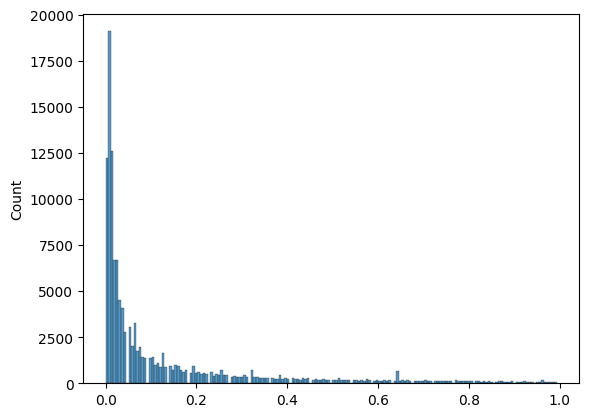

In [804]:
sns.histplot(sr_mean[(sr_mean < 1)]);

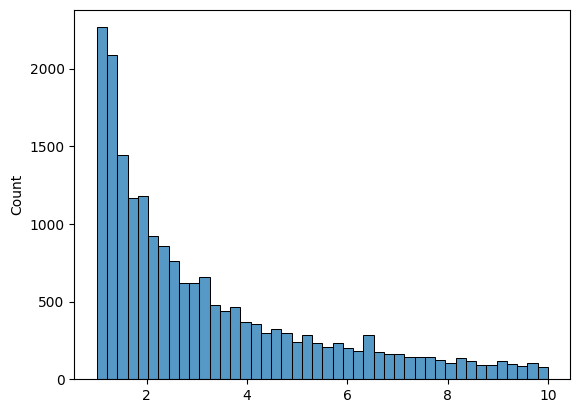

In [806]:
sns.histplot(sr_mean[(sr_mean < 10) & (sr_mean > 1)]);

In [816]:
st = sr_mean[sr_mean > 1000].shape[0]
col =  np.random.choice(st)

In [57]:
df_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [58]:
df_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [65]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from window_ops.rolling  import rolling_mean
from mlforecast import MLForecast


models = [RandomForestRegressor(random_state=0, n_estimators=100),
          ExtraTreesRegressor(random_state=0, n_estimators=100)]

In [62]:
from numba import njit
@njit
def diff(x, lag):
    x2 = np.full_like(x, np.nan)
    for i in range(lag, len(x)):
        x2[i] = x[i] - x[i-lag]
    return x2

In [66]:
model = MLForecast(models=models,
                   freq='m',
                   lags=[1,3,6,9,12],
                   lag_transforms={
                       1: [(rolling_mean, 1), (rolling_mean, 3), (rolling_mean, 6), (diff, 1), (diff, 3)],
                   },
                   num_threads=6)

In [71]:
test = df_train.iloc[:,:10]

In [72]:
test

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416
2008-01-01,0,0,0,0,0,0,0,2,0,0
2008-02-01,0,0,0,0,0,0,0,2,0,0
2008-03-01,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0
2020-10-01,0,0,0,0,0,0,0,4,10,0
2020-11-01,0,0,0,0,0,0,0,1,0,0


In [73]:
df

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
103379653791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104080986274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105025501059,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106130007753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106939853290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653761044143,0,0,0,0,0,0,1,0,5,0,...,4,0,0,0,4,2,4,4,0,4
7654080459855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


25336080

## Extract data to train

In [87]:
test = df.head().copy()
test = test.reset_index()
test

,MatNr_n,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
0,103379653791,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104080986274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,105025501059,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,106130007753,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,106939853290,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
test  = test.melt(id_vars = "MatNr_n", var_name='date',value_name="value")

In [98]:
test['date'] = test['date'].apply(lambda x: datetime.strptime(x,'M%Y%m').date())

In [99]:
test

,MatNr_n,date,value
0,103379653791,2008-01-01,0
1,104080986274,2008-01-01,0
2,105025501059,2008-01-01,0
3,106130007753,2008-01-01,0
4,106939853290,2008-01-01,0
...,...,...,...
835,103379653791,2021-12-01,0
836,104080986274,2021-12-01,0
837,105025501059,2021-12-01,0
838,106130007753,2021-12-01,0


## Create mini data training and test

In [120]:
cols_train = df.columns[:-12]
cols_test = df.columns[-12:]
df_train = df[cols_train]
df_test = df[cols_test]

In [133]:
df_train

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202003,M202004,M202005,M202006,M202007,M202008,M202009,M202010,M202011,M202012
MatNr_n,,,,,,,,,,,,,,,,,,,,,
103379653791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104080986274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105025501059,0,0,0,0,0,7,0,0,0,0,...,2,0,5,0,0,0,0,0,0,0
106130007753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106939853290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653761044143,0,0,0,0,0,0,1,0,5,0,...,2,0,0,0,0,2,2,8,2,0
7654080459855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df_test

,M202101,M202102,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,
103379653791,0,0,0,0,0,0,0,0,0,0,0,0
104080986274,0,0,0,0,0,0,0,0,0,0,0,0
105025501059,0,1,0,0,0,0,0,0,1,0,0,0
106130007753,0,0,0,0,0,0,0,0,0,0,0,0
106939853290,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,0,0
7653761044143,2,4,4,0,0,0,4,2,4,4,0,4
7654080459855,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
mini_train = df_train.iloc[:10,].copy()
mini_train.reset_index(inplace = True)

mini_test = df_test.iloc[:10, ].copy()
mini_test.reset_index(inplace = True)

In [191]:
mini_train = mini_train.melt(id_vars = "MatNr_n", var_name='date',value_name="demand")
mini_test = mini_test.melt(id_vars = "MatNr_n", var_name='date',value_name="demand")

mini_train['date'] = mini_train['date'].apply(lambda x: datetime.strptime(x,'M%Y%m').date())
mini_test['date'] = mini_test['date'].apply(lambda x: datetime.strptime(x,'M%Y%m').date())

In [203]:
mini_train['date'] = pd.to_datetime(mini_train['date'])
mini_test['date'] = pd.to_datetime(mini_test['date'])

In [153]:
mini_train =mini_train.sort_values(by=['MatNr_n','date']).reset_index(drop=True)

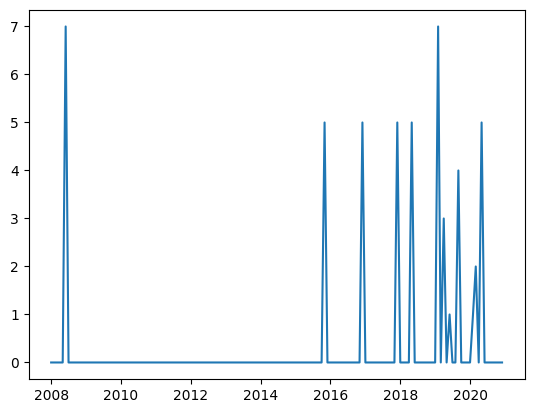

In [167]:
index = np.random.choice(mini_train.MatNr_n.unique())
plt.plot(mini_train[mini_train['MatNr_n'] == index].date,mini_train[mini_train['MatNr_n'] == index].demand );

In [168]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

models = [RandomForestRegressor(random_state=0, n_estimators=100),
          ExtraTreesRegressor(random_state=0, n_estimators=100)]

In [169]:
from numba import njit

@njit
def diff(x, lag):
    x2 = np.full_like(x, np.nan)
    for i in range(lag, len(x)):
        x2[i] = x[i] - x[i-lag]
    return x2

In [170]:
from window_ops.rolling import rolling_mean
from mlforecast import MLForecast

model = MLForecast(models=models,
                   freq='m',
                   lags=[1,3,6],
                   lag_transforms={
                       1: [(rolling_mean, 3), (rolling_mean, 6), (diff, 1), (diff, 3), (diff, 6)],
                   },
                   num_threads=6)

In [194]:
model.fit(mini_train, id_col='MatNr_n', time_col='date', target_col='demand', static_features=[])

MLForecast(models=[RandomForestRegressor, ExtraTreesRegressor], freq=<MonthEnd>, lag_features=['lag1', 'lag3', 'lag6', 'rolling_mean_lag1_window_size3', 'rolling_mean_lag1_window_size6', 'diff_lag1_lag1', 'diff_lag1_lag3', 'diff_lag1_lag6'], date_features=[], num_threads=6)

In [205]:
p = model.predict(horizon=12, dynamic_dfs=[mini_test[['MatNr_n', 'date']]])

In [207]:
mini_test

,MatNr_n,date,demand
0,103379653791,2021-01-01,0
1,104080986274,2021-01-01,0
2,105025501059,2021-01-01,0
3,106130007753,2021-01-01,0
4,106939853290,2021-01-01,0
...,...,...,...
115,160992885671,2021-12-01,0
116,161107452321,2021-12-01,0
117,161539455622,2021-12-01,0
118,163181801118,2021-12-01,0


In [216]:
p = p.sort_values(by = ['MatNr_n','date'])
p.head()

,MatNr_n,date,RandomForestRegressor,ExtraTreesRegressor
0,103379653791,2020-12-31,0.261119,0.259813
1,103379653791,2021-01-31,0.261119,0.289495
2,103379653791,2021-02-28,0.000000,0.234150
3,103379653791,2021-03-31,0.000000,0.186187
4,103379653791,2021-04-30,0.000000,0.170598


In [226]:
mini_test

,MatNr_n,date,demand
0,103379653791,2021-01-01,0
1,104080986274,2021-01-01,0
2,105025501059,2021-01-01,0
3,106130007753,2021-01-01,0
4,106939853290,2021-01-01,0
...,...,...,...
115,160992885671,2021-12-01,0
116,161107452321,2021-12-01,0
117,161539455622,2021-12-01,0
118,163181801118,2021-12-01,0


In [241]:
p.date = p.date.values +  pd.Timedelta(days=1)

In [1]:
index = np.random.choice(mini_train.MatNr_n.unique())
# plt.plot(mini_train[mini_train['MatNr_n'] == index].date, mini_train[mini_train['MatNr_n'] == index].demand, label = "demand");
plt.plot(mini_test[mini_test['MatNr_n'] == index].date,mini_test[mini_test['MatNr_n'] == index].demand, label = "demand");
plt.plot(p[p['MatNr_n'] == index].date,p[p['MatNr_n'] == index].RandomForestRegressor, label = "RandomForestRegressor");
plt.plot(p[p['MatNr_n'] == index].date,p[p['MatNr_n'] == index].ExtraTreesRegressor, label = "ExtraTreesRegressor");
plt.legend()

NameError: name 'np' is not defined

In [244]:
 p.merge(mini_test[['MatNr_n', 'date', 'demand']], on=['MatNr_n', 'date'], how='left')p =

In [245]:
p

,MatNr_n,date,RandomForestRegressor,ExtraTreesRegressor,demand
0,103379653791,2021-01-01,0.261119,0.259813,0
1,103379653791,2021-02-01,0.261119,0.289495,0
2,103379653791,2021-03-01,0.000000,0.234150,0
3,103379653791,2021-04-01,0.000000,0.186187,0
4,103379653791,2021-05-01,0.000000,0.170598,0
...,...,...,...,...,...
115,164088406416,2021-08-01,0.261119,0.258000,0
116,164088406416,2021-09-01,0.261119,0.440000,0
117,164088406416,2021-10-01,0.000000,0.635000,0
118,164088406416,2021-11-01,0.000000,0.630000,0


## Evaluate

In [246]:
## Threshold 0.5
pred = p.copy()

In [248]:
def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

print(f"WMAPE RandomForestRegressor: {wmape(pred['demand'], pred['RandomForestRegressor'])}\nWMAPE ExtraTreesRegressor: {wmape(pred['demand'], pred['ExtraTreesRegressor'])}")

WMAPE RandomForestRegressor: 1.2782215215046908
WMAPE ExtraTreesRegressor: 1.4098214786381842


In [253]:
pred['r_RFR'] = np.round(pred['RandomForestRegressor'])
pred['r_ETR'] = np.round(pred['ExtraTreesRegressor'])

In [254]:
print(f"WMAPE RandomForestRegressor: {wmape(pred['demand'], pred['r_RFR'])}\nWMAPE ExtraTreesRegressor: {wmape(pred['demand'], pred['r_ETR'])}")

WMAPE RandomForestRegressor: 1.2571428571428571
WMAPE ExtraTreesRegressor: 1.3785714285714286
